## Notebook to run deep neural network models on the cifar10 dataset

Code for the models lives at https://gitlab.com/harinik/mlprojects/tree/master/mlprojects/cifar10

The git repo above is cloned in this notebook in order to access the models.

In [1]:
# Clone git repo that has the models for training on cifar10 data
import shutil
import os
if os.path.exists('mlprojects'):
  shutil.rmtree('mlprojects')
!git clone https://gitlab.com/harinik/mlprojects.git

Cloning into 'mlprojects'...
remote: Enumerating objects: 42194, done.
remote: Counting objects: 100% (42194/42194), done.
remote: Compressing objects: 100% (7120/7120), done.
remote: Total 42194 (delta 35063), reused 42169 (delta 35048)
Receiving objects: 100% (42194/42194), 13.43 MiB | 27.19 MiB/s, done.
Resolving deltas: 100% (35063/35063), done.


In [2]:
# Verify that files are present
!ls mlprojects

mlprojects  README.md


In [0]:
# Update the paths to find the files correctly
import sys
sys.path.append('mlprojects/mlprojects/cifar10')
sys.path.append('mlprojects/mlprojects/utils')
from tensorflow import keras
import cifar_models as cm
import modelreg as mr
import keras_utils

In [0]:
# Load the cifar10 dataset hosted on keras
def loaddata():
  datasets = {}
  (datasets['train_x'], datasets['train_y']), (datasets['test_x'], datasets['test_y']) = keras.datasets.cifar10.load_data()
  print('train_x.shape: ', datasets['train_x'].shape)
  print('test_x.shape: ', datasets['test_x'].shape)
   
  return datasets

In [5]:
datasets = loaddata()

train_x.shape:  (50000, 32, 32, 3)
test_x.shape:  (10000, 32, 32, 3)


In [0]:
# get training configuration
#@title Training config params
def getconfig():
  epochs = 250 #@param {type:'number'}
  batch_size = 128 #@param {type: 'number'}
  learning_rate = 0.001 #@param {type: 'number'}
  augment_data = True #@param {type: 'boolean'}
  config = {}
  config['epochs'] = epochs 
  config['batch_size'] = batch_size
  config['augment'] = augment_data
  config['optimizer'] = keras.optimizers.Adam(lr=learning_rate)
  return config  

In [7]:
config = getconfig()
print(config)

Instructions for updating:
Colocations handled automatically by placer.
{'epochs': 250, 'batch_size': 128, 'augment': True, 'optimizer': <tensorflow.python.keras.optimizers.Adam object at 0x7f86d5e10710>}


In [8]:
#@title Model name
names = list(mr.MODELMAP.keys())
print('Pick from: ', names)
m = "cnn2" #@param {type: 'string'}

Pick from:  ['dnn1', 'cnn1', 'cnn1bndr', 'cnn1bn', 'cnn2', 'cnn3']


categories:  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Training model:  CNN2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
________________

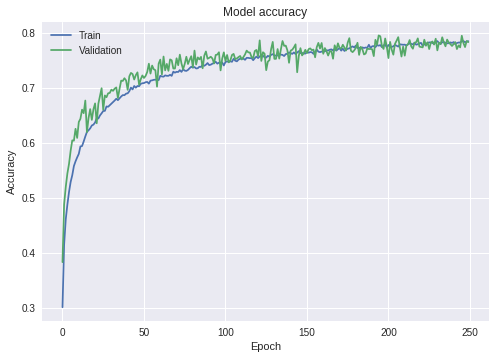

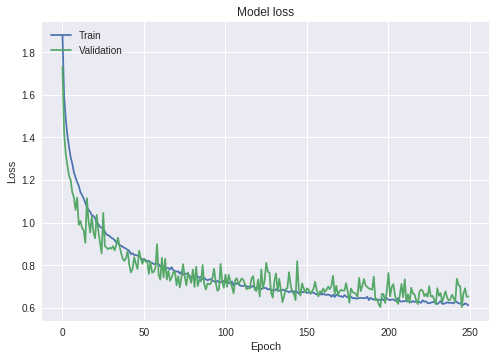

test loss:  0.647042631722106  test accuracy:  0.786


In [9]:
print('categories: ', cm.CATEGORIES)
mc = mr.MODELMAP[m]
mod = mc(datasets, len(cm.CATEGORIES), config)
mod.train()

Saving horse1.jpg to horse1.jpg


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


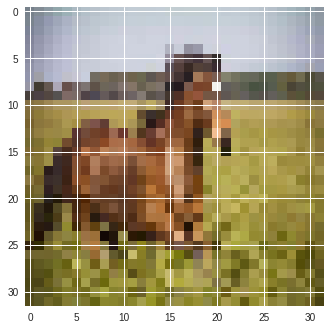

Predicted:  horse


In [14]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  pred = keras_utils.keras_img_predict(mod.model, fn, 32, 32)
  print('Predicted: ', cm.CATEGORIES[pred])